# Difficulty analyis

Here we analyze the difficulty of words by the expected value of Trial percentage, i.e., mean value of number of trials. 

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy as np

In [26]:
df = pd.read_excel("./dataset/wordle_data.xlsx", index_col=0, usecols="A,C,F:L")
df['Num_of_trials'] = (df['trial_1'] + 2 * df['trial_2'] + 3 * df['trial_3'] +\
      4 * df['trial_4'] + 5 * df['trial_5'] + 6 * df['trial_6'] \
        + 7 * df['trial_x']) / 100

df

,word,trial_1,trial_2,trial_3,trial_4,trial_5,trial_6,trial_x,Num_of_trials
date,,,,,,,,,
2022-12-31,manly,0,2,17,37,29,12,2,4.34
2022-12-30,molar,0,4,21,38,26,9,1,4.14
2022-12-29,havoc,0,2,16,38,30,12,2,4.40
2022-12-28,impel,0,3,21,40,25,9,1,4.15
2022-12-27,condo,0,2,17,35,29,14,3,4.45
...,...,...,...,...,...,...,...,...,...
2022-01-11,drink,1,9,35,34,16,5,1,3.77
2022-01-10,query,1,4,16,30,30,17,2,4.43
2022-01-09,gorge,1,3,13,27,30,22,4,4.64


Freedman–Diaconis number of bins: 21


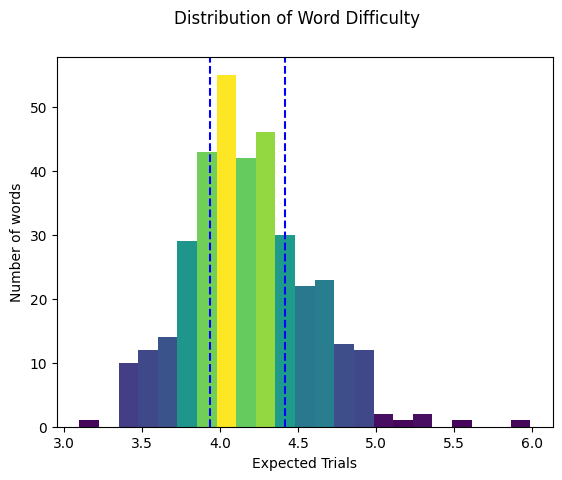

In [28]:
x = np.asarray(df['Num_of_trials'])
q25, q75 = np.percentile(x, [25, 75])
bin_width = 2 * (q75 - q25) * len(x) ** (-1/3)
bins = round((x.max() - x.min()) / bin_width)
print("Freedman–Diaconis number of bins:", bins)
bins += 2


# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = plt.hist(x, bins=bins)
# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

plt.xlabel('Expected Trials')
plt.ylabel('Number of words')
plt.suptitle('Distribution of Word Difficulty')

q33, q66 = np.percentile(x, [33.3, 66.6])
plt.axvline(x = q25, color = 'b', linestyle = '--', label = 'Easy-Normal Thershold')
plt.axvline(x = q75, color = 'b', linestyle = '--', label = 'Normal-Hard Thershold')

And we decide to use 33.3 and 66.6 percentile Expected Trials as seperation of Easy, normal and hard.